# pytorch中图像的分块（patch）操作
pytorch中图像的分块（patch）操作（使用了.permute()维度转换）
下面就看一下在图像分块上面的操作.
首先给定一张图片

d:\anaconda3\envs\pytorch110\lib\site-packages\torchvision\transforms\transforms.py:317: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


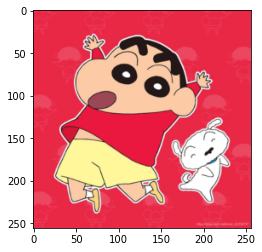

In [3]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


def readImage(path='test.jpg', size=256):#这里可以替换成自己的图片
    mode = Image.open(path)
    transform1 = transforms.Compose([
        transforms.Scale(size),
        transforms.CenterCrop((size, size)),
        transforms.ToTensor()
    ])
    mode = transform1(mode)
    return mode


def showTorchImage(image):
    mode = transforms.ToPILImage()(image)
    plt.imshow(mode)
    plt.show()


if __name__ == '__main__':
    mode = readImage(size=256)
    showTorchImage(mode)


In [4]:
# 输出图片的大小：
import torch
print(mode.size())

torch.Size([3, 256, 256])


可以看到图片的大小为256*256的，是RGB型的.
然后将图片分为四块：

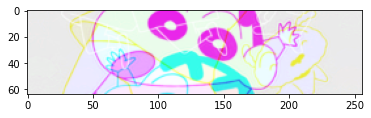

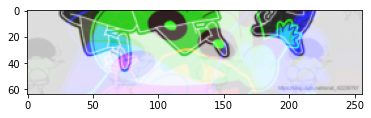

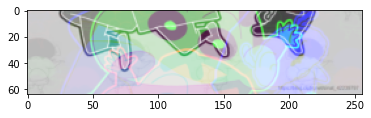

IndexError: index 3 is out of bounds for dimension 0 with size 3

In [5]:
image=mode
image=image.view(3,4,64,256)
showTorchImage(image[0])
showTorchImage(image[1])
showTorchImage(image[2])
showTorchImage(image[3])
# 得到的结果是这样的：


这里很奇怪，
第一：我们分割为四块却显示不出第四块，另外产生了重影的图像，并不能看清楚分割的真实情况。
猜想是分割时维度产生变换，于是添加维度变换

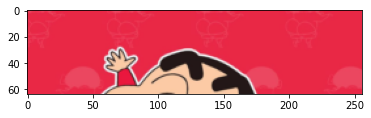

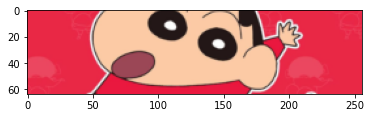

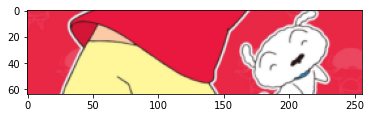

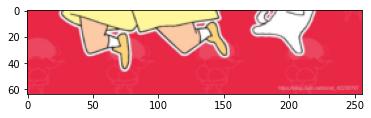

In [ ]:
image=mode
image=image.view(3,4,64,256)
image=image.permute(1,0,2,3)#交换维度
showTorchImage(image[0])
showTorchImage(image[1])
showTorchImage(image[2])
showTorchImage(image[3])


In [ ]:
overlap = 96
shape0 = 169
dz = 128 - overlap
z_range = list(range(0, shape0-128, dz))
print(z_range)
z_range.append(shape0-128)
print(z_range)
z_range = sorted(list(set(z_range)))  # remove duplicate
print(z_range)

[0, 32]
[0, 32, 41]
[0, 32, 41]


In [6]:
output = torch.unique(torch.tensor([1, 3, 2, 3], dtype=torch.long))
output

tensor([1, 2, 3])